# Eye4Talent's TalentPredictor
I en over simplificeret verden, har vi mennesker og maskiner. En af de klare forskelle på mennesker og maskiner er, at mennesker lærer fra erfaring, mens maksiner er programmeret til at følge regler skabt af mennesker. Men kan vi få maskiner til også at lære fra erfaring? - Svaret er naturligvis ja. Det er lige hvad machine learning gør. Omend erfaring er nødt til at komme i et dataformat. Machine Learning anvender det vi kalder en algoritme (et sæt regler) til at identificere mønstre i data og en matematisk model til beskrive verdenen. Målet er at gøre maskiner i stand til at lære, uden på forhånd at være eksplicit forprogrammeret til det.

### Essensen af machine learning
Essensen af machine learning kan kodes ned til tre punkter.
1. Der skal være et mønster.
2. Det skal ikke være muligt at finde svar matematisk.
3. Der skal være data tilgængeligt.

Det er en nødvendighed at sætte hak ved alle tre ovenstående punkter før du kan påbegynde et machine learning projekt.

### Essensen af Eye4Talent's machine learning projekt
1. I Eye4Talent mener vi, at der eksisterer et mønster for talent. Der er et sæt af faktorer der gør sig gældende for de spillere der opnår højeste status i fodboldensverden.
2. Det er tydeligvis ikke været muligt, at finde et matematisk svar for talent. Vi kan ikke sige, at $højde * vægt + teknik = Talent$
3. Vi har fire års scouting rapporter fra DBU, hvilket svarer til cirka 6.000 datapunkter.

Med udgangspunkt i de 6000 drenges udfald, hvor vidt de blev udvalgt til hhv. U17, U19 og U21, vil vi bygge en supervised machine learning model, der skal kunne forudsige, hvad sandsynligheden er for at komme på ungdomslandsholdet. 

#### Hvad er supervised machine learning?
Hvis du lærer dit barn om forskellige slags frugter, der er tilgængelige i verden ved at vise billedet af hver frugt (X) og dets navn (y), så er det supervised machine learning. 

## Import Libraries & Packages

In [1]:
import pandas as pd               # pandas is a dataframe library
import matplotlib.pyplot as plt   # matplotlib.pyplot plots data
import numpy as np                # numpy provides N-dim object support
import os

# do ploting inline instead of in a seperate window
%matplotlib inline

## Load & Review Data

In [2]:
#Defining the current directory
currDir = os.getcwd()
#Defining filesep
fileSep = os.sep
#Defining the folder where the files are located:
file_path = os.path.join (currDir + fileSep + "Documents" + fileSep + "Eye4Talent" + fileSep + "Prediction" + fileSep)

#Define path to training data
df = os.path.join(file_path, 'U21_data_clean_V2.csv') 
#Reading data file:
df = pd.read_csv(df, sep=';', encoding="latin1")

In [3]:
df.shape #(antal rækker, antal variable)

(137, 25)

In [4]:
df.head(5)

,ID,Name,Country,Value,Reports,PlayedTime,Finishontarget,Finishofftarget,Finishblocked,1stAss,...,Rec_avg,M_1stAbility_avg,M_2ndAbility_avg,M_3rdAbility_avg,M_4thAbility_avg,P_1stAbility_avg,P_2ndAbility_avg,P_3rdAbility_avg,P_4thAbility_avg,Target1
0,1,Abdullah Khalili,Sverige,250000,4,360,2,5,0,7,...,0.600000,2.800000,2.800000,2.800000,3.000000,2.760000,2.300000,2.740000,2.240000,0
1,2,Aleksandar Cavric,Serbien,400000,2,68,1,0,0,0,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0
2,3,Aleksandar Kovacevic,Serbien,1000000,1,67,0,1,0,0,...,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0
3,4,Aleksandar Pantic,Serbien,2500000,3,268,1,0,0,0,...,0.666667,2.666667,3.000000,2.333333,2.333333,0.566667,0.766667,1.000000,0.933333,0
4,5,Aleksandar Pe_ic,Serbien,500000,3,270,0,1,0,0,...,0.000000,1.333333,1.333333,1.666667,1.666667,0.666667,0.666667,1.166667,0.500000,0


In [5]:
df.tail(5)

,ID,Name,Country,Value,Reports,PlayedTime,Finishontarget,Finishofftarget,Finishblocked,1stAss,...,Rec_avg,M_1stAbility_avg,M_2ndAbility_avg,M_3rdAbility_avg,M_4thAbility_avg,P_1stAbility_avg,P_2ndAbility_avg,P_3rdAbility_avg,P_4thAbility_avg,Target1
132,133,Victor Lindelf,Sverige,1500000,4,360,1,1,0,0,...,0.333333,2.000000,1.666667,2.000000,1.333333,1.100000,0.5,0.666667,1.333333,1
133,134,Viktor Fischer,Danmark,5000000,3,270,2,1,0,0,...,0.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.0,0.000000,0.000000,1
134,135,Will Hughes,England,7000000,2,180,0,0,1,1,...,0.800000,2.800000,2.800000,2.600000,2.000000,2.400000,1.6,2.900000,2.540000,1
135,136,William Carvalho,Portugal,26000000,4,111,0,0,5,2,...,1.000000,1.666667,2.333333,2.333333,2.000000,2.266667,2.5,1.500000,1.766667,1
136,137,Yussuf Poulsen,Danmark,4000000,5,351,2,1,3,0,...,0.000000,0.500000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1


Datakilden indeholder følgende variable: 

|Variable | Definition   |
|------|------|
|   ID | Nøglen der binder information til en spiller |
|   Country | Det land hvor spilleren er spilleberetiget |
|   Value | Spillerens markedsværdi (transfermarkt) under U21 EM  |
|   Reports | Antal udarbejdet scouting rapporter |
|   PlayedTime | Antal spille minutter rapporteret i pågældende scouting rapporter |
|   Finishontarget | Det samlede antal afslutninger på mål i løbet af U21 EM |
|   Finishofftarget | Det samlede antal afslutninger uden for mål i løbet af U21 EM |
|   Finishblocked | Det samlede antal afslutninger, der blev blokeret i løbet af U21 EM |
|   1stAss | Det samlede antal assister i løbet af U21 EM |
|   2ndAss | Det samlede antal anden assister i løbet af U21 EM |
|   SOB_LAB |  |
|   SOB_CAB |  |
|   Anders | Antal rapporter lavet af Anders Thyme |
|   Jesper | Antal rapporter lavet af Jesper Thyme |
|   Rec_avg | Gennemsnitlig "recommendation" set over alle scouting rapporter |
|   M_1stAbility_avg |  |
|   M_2ndAbility_avg |  |
|   M_3rdAbility_avg |  |
|   M_4thAbility_avg |  |
|   P_1stAbility_avg |  |
|   P_2ndAbility_avg |  |
|   P_3rdAbility_avg |  |
|   P_4thAbility_avg |  |
|   Target1 | Har spillet en champions league kamp anno 17/18 sæsonen |

## Data preparation

In [6]:
df.isnull().values.any() #Tjek for null-values

False

In [7]:
df.dtypes #Tjek variables dataformat

ID                    int64
Name                 object
Country              object
Value                 int64
Reports               int64
PlayedTime            int64
Finishontarget        int64
Finishofftarget       int64
Finishblocked         int64
1stAss                int64
2ndAss                int64
SIB_CAB               int64
SOB_LAB               int64
Anders                int64
Jesper                int64
Rec_avg             float64
M_1stAbility_avg    float64
M_2ndAbility_avg    float64
M_3rdAbility_avg    float64
M_4thAbility_avg    float64
P_1stAbility_avg    float64
P_2ndAbility_avg    float64
P_3rdAbility_avg    float64
P_4thAbility_avg    float64
Target1               int64
dtype: object

Supervised machine learning algoritmer kan kun tage numeriske værdier. Vi er derfor nødt til at gøre 'Country' til en kategorisk værdi, hvis vi vil medtage den i vores machine learning model.

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() 

In [10]:
le.fit(df.Country)

LabelEncoder()

In [11]:
df['Country'] = le.transform(df.Country)
df.head()

,ID,Name,Country,Value,Reports,PlayedTime,Finishontarget,Finishofftarget,Finishblocked,1stAss,...,Rec_avg,M_1stAbility_avg,M_2ndAbility_avg,M_3rdAbility_avg,M_4thAbility_avg,P_1stAbility_avg,P_2ndAbility_avg,P_3rdAbility_avg,P_4thAbility_avg,Target1
0,1,Abdullah Khalili,5,250000,4,360,2,5,0,7,...,0.600000,2.800000,2.800000,2.800000,3.000000,2.760000,2.300000,2.740000,2.240000,0
1,2,Aleksandar Cavric,4,400000,2,68,1,0,0,0,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0
2,3,Aleksandar Kovacevic,4,1000000,1,67,0,1,0,0,...,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0
3,4,Aleksandar Pantic,4,2500000,3,268,1,0,0,0,...,0.666667,2.666667,3.000000,2.333333,2.333333,0.566667,0.766667,1.000000,0.933333,0
4,5,Aleksandar Pe_ic,4,500000,3,270,0,1,0,0,...,0.000000,1.333333,1.333333,1.666667,1.666667,0.666667,0.666667,1.166667,0.500000,0


Tjekker for korrelation mellem vores variable, således vi ikke har variable der fortæller det samme og derved over komplicerer vores machine learning model. Kan resulterer i et biased resultat.

In [12]:
def plot_corr(df, size=22):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

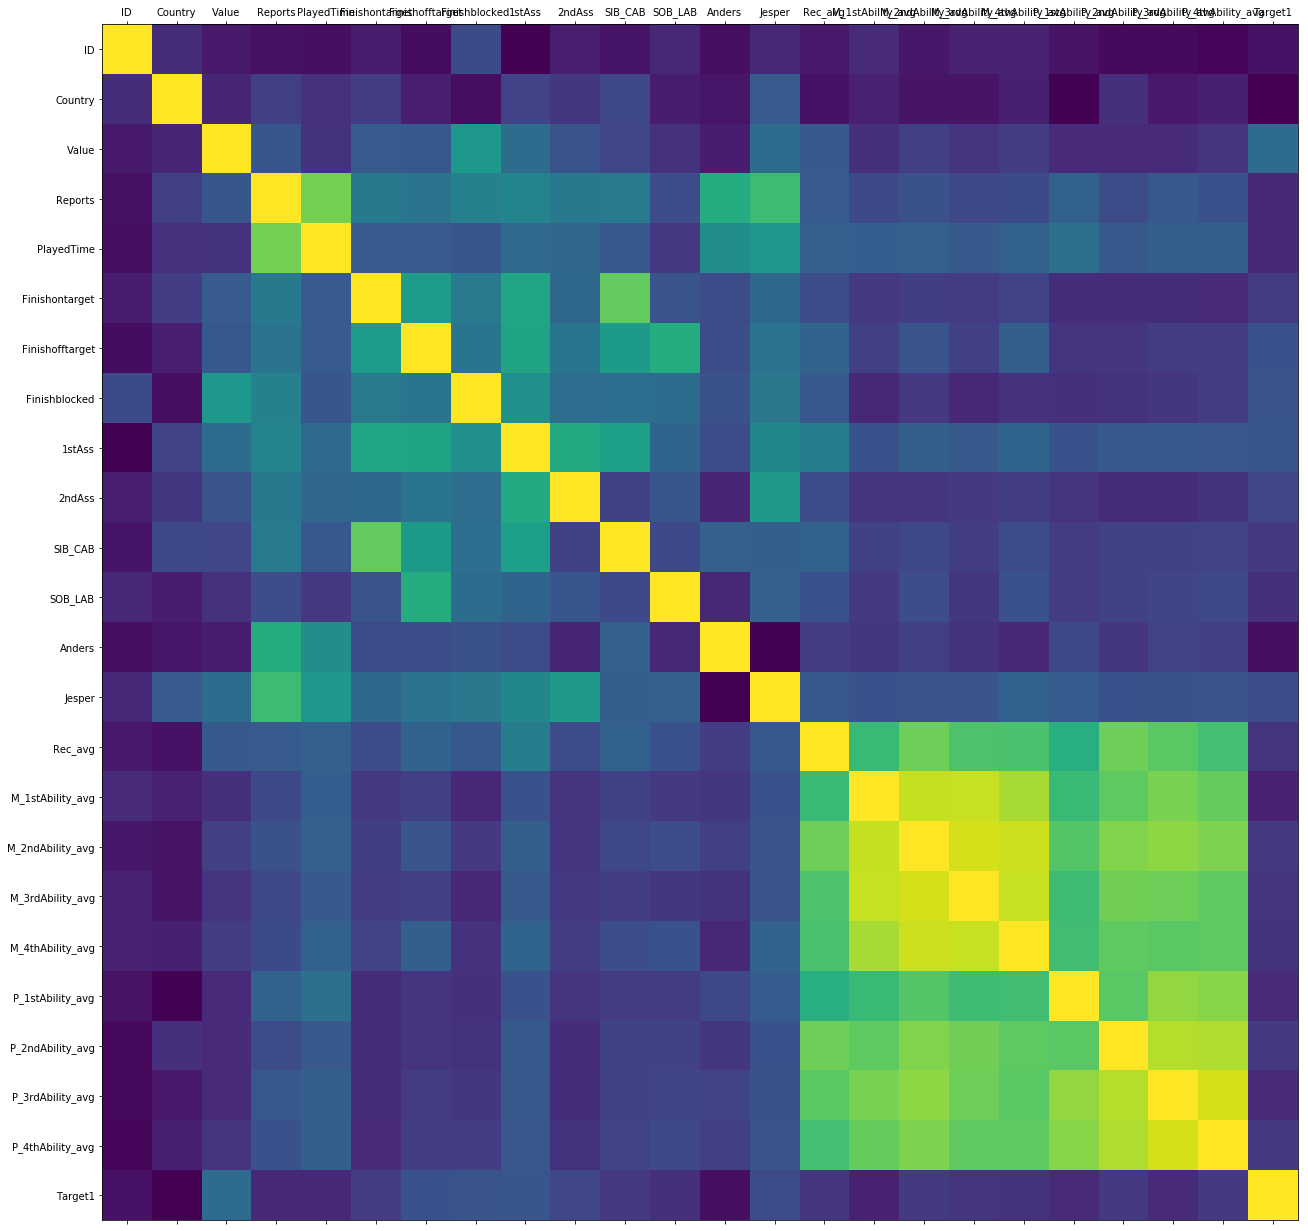

In [13]:
plot_corr(df)

In [14]:
df.corr()

,ID,Country,Value,Reports,PlayedTime,Finishontarget,Finishofftarget,Finishblocked,1stAss,2ndAss,...,Rec_avg,M_1stAbility_avg,M_2ndAbility_avg,M_3rdAbility_avg,M_4thAbility_avg,P_1stAbility_avg,P_2ndAbility_avg,P_3rdAbility_avg,P_4thAbility_avg,Target1
ID,1.000000,0.027231,-0.039885,-0.072051,-0.073823,-0.034161,-0.084299,0.133378,-0.114488,-0.027152,...,-0.045679,0.018630,-0.049989,-0.006798,-0.009799,-0.062509,-0.093756,-0.093070,-0.098687,-0.063504
Country,0.027231,1.000000,-0.001398,0.091856,0.038053,0.082844,-0.026700,-0.080798,0.103274,0.060375,...,-0.064781,-0.015802,-0.061687,-0.062479,-0.023926,-0.114639,0.036128,-0.045050,-0.022263,-0.120325
Value,-0.039885,-0.001398,1.000000,0.177919,0.043308,0.200901,0.189019,0.475031,0.275340,0.172786,...,0.195543,0.034083,0.092437,0.054447,0.082277,0.011978,0.013501,0.016463,0.049116,0.272623
Reports,-0.072051,0.091856,0.177919,1.000000,0.766580,0.331099,0.309943,0.367599,0.385969,0.332445,...,0.199608,0.128674,0.155445,0.122490,0.133474,0.229577,0.141971,0.186777,0.162935,0.003319
PlayedTime,-0.073823,0.038053,0.043308,0.766580,1.000000,0.199176,0.200346,0.181367,0.262933,0.251013,...,0.223601,0.212455,0.223233,0.192087,0.225708,0.292934,0.191641,0.219213,0.216761,0.004173
Finishontarget,-0.034161,0.082844,0.200901,0.331099,0.199176,1.000000,0.497642,0.345653,0.541469,0.256684,...,0.143388,0.067646,0.087121,0.072956,0.104546,0.025331,0.023268,0.026054,0.016487,0.078894
Finishofftarget,-0.084299,-0.026700,0.189019,0.309943,0.200346,0.497642,1.000000,0.316770,0.534157,0.313328,...,0.237968,0.090608,0.173699,0.090980,0.220461,0.048952,0.047390,0.075211,0.081948,0.163938
Finishblocked,0.133378,-0.080798,0.475031,0.367599,0.181367,0.345653,0.316770,1.000000,0.441841,0.279431,...,0.188786,0.006771,0.066668,0.006734,0.039059,0.035360,0.044688,0.059011,0.085060,0.172685
1stAss,-0.114488,0.103274,0.275340,0.385969,0.262933,0.541469,0.534157,0.441841,1.000000,0.564580,...,0.350938,0.160479,0.216848,0.191719,0.240301,0.163960,0.195205,0.193289,0.184159,0.177462
2ndAss,-0.027152,0.060375,0.172786,0.332445,0.251013,0.256684,0.313328,0.279431,0.564580,1.000000,...,0.135710,0.052164,0.052944,0.067682,0.081971,0.049371,0.023756,0.024152,0.042216,0.118164


Gul farve indikerer høj korrelation. Vi ser at alle M_abilities variablene er højt korreleret samt at alle P_abilities variablene er højt korreleret. Vi lægger dem derfor sammen, således vi har én M_ability variabel og én P_ability variabel

In [18]:
df['M_ability_avg'] = (df.M_1stAbility_avg + df.M_2ndAbility_avg + df.M_3rdAbility_avg + df.M_4thAbility_avg)/4

In [19]:
df['P_ability_avg'] = (df.P_1stAbility_avg + df.P_2ndAbility_avg + df.P_3rdAbility_avg + df.P_4thAbility_avg)/4

In [21]:
del df['M_1stAbility_avg']
del df['M_2ndAbility_avg']
del df['M_3rdAbility_avg']
del df['M_4thAbility_avg']

In [22]:
del df['P_1stAbility_avg']
del df['P_2ndAbility_avg']
del df['P_3rdAbility_avg']
del df['P_4thAbility_avg']

In [23]:
df.head()

,ID,Name,Country,Value,Reports,PlayedTime,Finishontarget,Finishofftarget,Finishblocked,1stAss,2ndAss,SIB_CAB,SOB_LAB,Anders,Jesper,Rec_avg,Target1,M_ability_avg,P_ability_avg
0,1,Abdullah Khalili,5,250000,4,360,2,5,0,7,1,2,1,4,1,0.600000,0,2.850000,2.510000
1,2,Aleksandar Cavric,4,400000,2,68,1,0,0,0,0,0,0,2,0,0.000000,0,1.000000,0.000000
2,3,Aleksandar Kovacevic,4,1000000,1,67,0,1,0,0,0,0,0,1,0,0.000000,0,2.000000,0.000000
3,4,Aleksandar Pantic,4,2500000,3,268,1,0,0,0,0,0,0,2,1,0.666667,0,2.583333,0.816667
4,5,Aleksandar Pe_ic,4,500000,3,270,0,1,0,0,0,0,0,2,1,0.000000,0,1.500000,0.750000


In [24]:
df.shape #(antal rækker, antal variable)

(137, 19)

In [25]:
def plot_corr(df, size=16):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

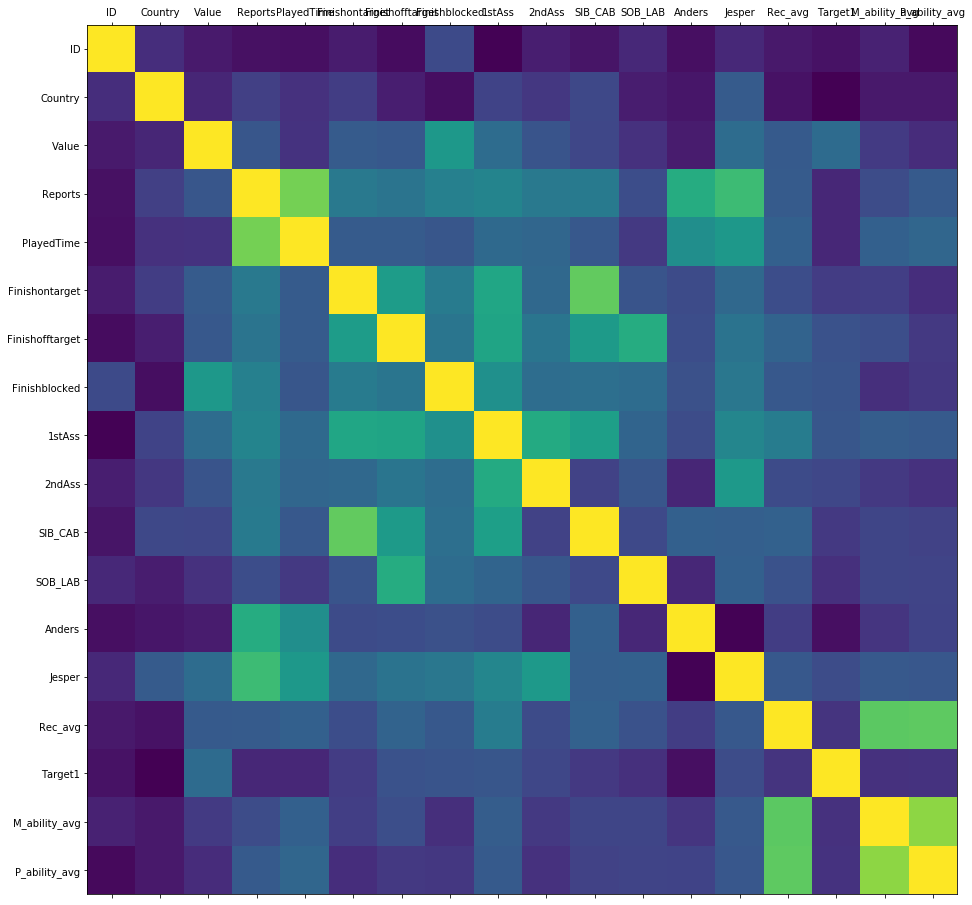

In [26]:
plot_corr(df)

Vi har nu mindsket den gule farve i vores korrelations plot og har dermed mindsket den høje korrelation mellem vores variable.

Før vi kan træne en algoritme, må vi fjerne Name, da dette er en string-variable og ikke en numerisk værdi

In [27]:
df_pre_train = df[['Country','Value','Reports','PlayedTime','Rec_avg','M_ability_avg','P_ability_avg', 'Target1']]

Følgende variable udgør vores datasæt til træning af algoritmen.

In [28]:
df_pre_train.head()

,Country,Value,Reports,PlayedTime,Rec_avg,M_ability_avg,P_ability_avg,Target1
0,5,250000,4,360,0.600000,2.850000,2.510000,0
1,4,400000,2,68,0.000000,1.000000,0.000000,0
2,4,1000000,1,67,0.000000,2.000000,0.000000,0
3,4,2500000,3,268,0.666667,2.583333,0.816667,0
4,4,500000,3,270,0.000000,1.500000,0.750000,0


Inden vi starter ser vi, at vores data indeholder 58 tilfælde af talent (42.43%).

In [29]:
num_true = len(df.loc[df['Target1'] == 1])
num_false = len(df.loc[df['Target1'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false))*100))
print("Number of False cases:  {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false))*100))

Number of True cases:  58 (42.34%)
Number of False cases:  79 (57.66%)


## Split data into train and test
70% for training, 30% for testing

Vi splitter data op i træningsdata og testdata (og nogle gange til tre: train, validation og test) og træner vores model på træningsdataene for at kunne forudsige testdataene. Træningssættet indeholder en kendt portion data (erfaring), og modellen lærer på denne erfaring for at kunne generalisere til anden data senere. Vi har testdatasættet for at teste vores models evne til at forudsige.

In [30]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['Country','Value','Reports','PlayedTime','Rec_avg','M_ability_avg','P_ability_avg']
predicted_class_names = ['Target1']

X = df_pre_train[feature_col_names].values
y = df_pre_train[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state=42)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [61]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (95, 7)
Training Labels Shape: (42, 7)
Testing Features Shape: (95, 1)
Testing Labels Shape: (42, 1)


Vi tjekker om vi har delt train og test op i 70% og 30%

In [32]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df_pre_train.index))*100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_pre_train.index))*100))

69.34% in training set
30.66% in test set


Verificerer om splittet er gjort korrekt

In [33]:
print("Original True : {0} ({1:0.2f}%)".format(len(df_pre_train[df_pre_train['Target1']==1]), (len(df_pre_train[df_pre_train['Target1']==1])/len(df_pre_train.index))*100))
print("Original False : {0} ({1:0.2f}%)".format(len(df_pre_train[df_pre_train['Target1']==0]), (len(df_pre_train[df_pre_train['Target1']==0])/len(df_pre_train.index))*100))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(y_train[y_train[:]==1]), (len(y_train[y_train[:]==1])/len(y_train))*100))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:]==0]), (len(y_train[y_train[:]==0])/len(y_train))*100))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(y_test[y_test[:]==1]), (len(y_test[y_test[:]==1])/len(y_test))*100))
print("Test False : {0} ({1:0.2f}%)".format(len(y_test[y_test[:]==0]), (len(y_test[y_test[:]==0])/len(y_test))*100))

Original True : 58 (42.34%)
Original False : 79 (57.66%)

Training True : 39 (41.05%)
Training False : 56 (58.95%)

Test True : 19 (45.24%)
Test False : 23 (54.76%)


Nu er vi klar til at fodre en algoritme med vores data. Algoritmen vi har valgt, der skal udgøre vores model er Random Forest.

## Random Forest

Random Forest er en supervised learning algoritme, der kan bruges til både klassifikation og regression. Den er kendt for at være fleksible og nem at anvende. En 'forrest' består af træer. Jo flere træer jo mere robust en 'forrest'. Random Forest skaber beslutningstræer på baggrund af tilfældigt udvalgte data samples, samler sandsynligheder ind for hver beslutningstræ og i sidste ende vælger den bedste løsning baseret på 'means of voting'. Med Random Forest fås også en god indikation for feature importance.

#### Hvordan virker Random Forest?
Forestil dig, at du gerne vil ud at rejse men ved ikke hvor hen. Så hvad gør du for at finde et sted at rejse? Du kan søge online, læse anmeldelser, blogs eller sågar spørge ens venner.

Lad os antage, at du har besluttet at spørge dine venner og få deres erfaringer om tidligere rejseoplevelse. Du får nogle anbefalinger fra hver ven. Nu skal du lave en liste over de anbefalede steder. Herefter beder du dem om at afgive en stemme over de anbefalede steder. Stedet med det højeste antal stemmer bliver dit endelige valg til rejsen.

I ovennævnte beslutningsproces er der to dele. Først spørger du dine venner om deres individuelle rejseoplevelse og får en liste af flere steder. Her foretager hver ven et udvalg af de steder (random samples), han eller hun har besøgt hidtil.

Anden del, efter at have samlet alle anbefalinger ind, kommer beslutningsproceduren (means of voting), hvor det bedste sted, fra listen over anbefalinger, skal vælges. De to dele lagt sammen er kendt som algoritmen, Random Forest.

Det er teknisk set en ensemble metode (baseret på 'divide-and-conquer approach') af beslutningstræer genereret på et tilfædigt splittet datasæt. De individuelle beslutningstræer genereres ved hjælp af en beslutnings indikator, såsom information gain, gain ratio og Gini-index. Hvert træ afhænger af en uafhængig random sample. 

I classification øjemed, afgiver hvert træ en afstemning og den mest populære class som det endelige resultat. 
I regression øjemed, betragtes gennemsnittet af alle træudgange som det endelige resultat. 

#### Pseudo kode:
1. Udfør random samples fra et givet datasæt
2. Konstruer et beslutningstræ for hver sample og indsaml en sandsynlighed fra hvert beslutningstræ.
3. Udfør en afstemning for hver forventet sandsynlighed.
4. Vælg den de sandsynligheder der resulterer i flest stemmer som den endelige sandsynlighed.

<img src="Images/voting_dnjweq.jpg">

__Fordele:__

- Random Forest betragtes som en yderst nøjagtig og robust metode på grund af antallet af beslutningstræer, der tager del i algoritmen.
- Den lider ikke af overfitting problemet. Hovedårsagen er, at det tager gennemsnittet af alle forudsigelserne, hvilke fjerner evt. bias.
- Algoritmen kan bruges i både klassifikations- og regressionsproblemer.
- Random Forest kan også håndtere manglende værdier. Der er to måder at håndtere disse på: Brug af medianværdier til at erstatte kontinuerlige variabler og beregne det nærliggende vægtede gennemsnit af manglende værdier.
- Du kan få den relative 'feature importance', som hjælper med at vælge de mest bidragende variable til klassificeringsenheden.

__Ulemper:__

- Random Forest er langsom til at generere forudsigelser, fordi de har flere beslutningstræer. Når det drejer sig om en forudsigelse, skal alle træerne i skoven lave en forudsigelse for den samme givne input og derefter udføre afstemning på den. Hele processen er tidskrævende.
- Modellen er vanskelig at fortolke i forhold til et beslutningstræ, hvor man nemt kan træffe en beslutning ved at følge stien i træet.

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf_model = RandomForestClassifier(n_estimators=11, min_samples_split=2, random_state = 42)
rf_model.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict training data

In [63]:
rf_predict_train = rf_model.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9895


### Predict training data

In [64]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.6429


In [65]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")

print("Classifiation Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[17  6]
 [ 9 10]]

Classifiation Report
             precision    recall  f1-score   support

          0       0.65      0.74      0.69        23
          1       0.62      0.53      0.57        19

avg / total       0.64      0.64      0.64        42



*Confusion matrix:*
<br> [TN  FP]
<br> [FN  TP]

<br> *A perfect classifier:*
<br> [20  0]
<br> [0  22]

*Classification Report:*
<br> Precision = TP / (TP + FP) & TN / (TN + FN)
<br> Recall = TP / (TP + FN) & TN / (TN + FP)

### Feature Importance
Random Forest kan som sagt give en indikation af en variabels vigtighed i klassficerings øjemed. Scikit-learning giver en ekstra variabel med modellen, som viser den relative betydning eller bidrag af hver variabel i forudsigelsen. Den beregner automatisk relevansscoren for hver variabel i træningsfasen. Derefter skalerer den relevansen ned, så summen af alle scoringer er 1.

Denne score vil hjælpe dig med at vælge de vigtigste variable og slippe de mindst vigtige til modelbygning.

Random Forest bruger 'gini-index' eller 'mean decrease in impurity' (MDI) for at beregne betydningen af hver variabel. 'Gini-index' er også kendt som det samlede fald i 'node impurity'. Dette er, hvor meget modellen passer eller nøjagtigheden falder, når du fjerner en variabel. Jo større faldet er, jo signifikant er variablen. Her er det gennemsnitlige fald en væsentlig parameter for variabelt udvalg. 'Gini-index' kan beskrive den generelle forklarende effekt af variablerne.

In [66]:
feature_imp = pd.Series(rf_model.feature_importances_,index=feature_col_names).sort_values(ascending=False)
feature_imp

Value            0.270233
P_ability_avg    0.149644
Rec_avg          0.149208
PlayedTime       0.126055
M_ability_avg    0.121063
Country          0.106682
Reports          0.077116
dtype: float64

No handles with labels found to put in legend.


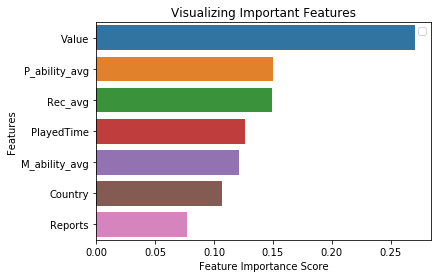

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Forbedring af model
Nu har vi bygget vores Random Forest model til at løse vores machine learning problem, men vi er ikke alt for imponerede af resultaterne. Hvad er vores muligheder? Første skridt er at samle mere data ind og udføre 'feature engineering'. At samle mere data og udføre 'feature engineering' har normalt det største udbytte i form af tid investeret i forhold til forbedret ydeevne, men når vi har opbrugt alle datakilder, er det tid til at gå videre til 'hyperparameter tuning'.

### Hyperparameter tuning
Den bedste måde at tænke på 'hyperparameter tuning' er som indstillingerne for en algoritme, der kan justeres for at optimere ydeevnen, ligesom vi måske kan dreje knaperne på en radio for at få et klart signal.

#### N_estimators

*n_estimators* repræsenterer antallet af træer. Normalt jo højere antallet af træer er, desto bedre er det at lære fra data. Men at tilføje mange træer kan reducere træningsprocessen betydeligt, derfor foretager vi en parametersøgning for at det optimale antal. En tommelfingerregel hedder $2/3 * antal rækker = n$

#### max_depth

*max_depth* repræsenterer dybden af hvert træ. Jo dybere træet er, jo flere gange splittes det, og fanger derved mere information om data. 

#### min_samples_split

*min_samples_split* repræsenterer det mindste antal samples, der kræves for at opdele en intern node. Når vi øger denne parameter, bliver hvert træ mere begrænset, da det skal overveje flere samples for hver knude.

#### min_samples_leaf

*min_samples_leaf* er det mindste antal samples, der kræves for at være ved en 'leaf node'. Denne parameter ligner *min_samples_splits*, dog beskriver den det mindste antal samples af samples ved bunden af træet.

#### max_features

*max_features* repræsenterer antallet af variable, der skal overvejes, når man leder efter det bedste split.

## Cross Validation
Cross Validation (CV) er bedst forklaret ved et eksempel af den mest almindelige metode, K-Fold CV. Når vi har et et machine learning problem, sørger vi for at opdele vores data i et træning og et test sæt. I K-Fold CV deler vi vores træningssæt videre op i K antal undergrupper, kaldet folder. Vi tilpasser derefter iterativt modellen K gange, hver gang træning af dataene på $K-1$ i folderne og evaluering af $K^th$-folder (kaldet valideringsdata). F.eks. tænk på at køre en model igennem $K = 5$ gange. Den første iteration træner vi på de første fire folder og evaluerer den femte. Anden gang træner vi på den første, anden, tredje og femte fold og evaluerer på den fjerde. Vi gentager denne procedure 3 gange mere. I slutningen af træningen beregner vi gennemsnittet præstationen på hver af folderne for at komme frem til endelige valideringsmålinger for modellen.

<img src="Images/0*KH3dnbGNcmyV_ODL.png">

Til 'hyperparameter tuning' udfører vi mange iterationer af hele K-Fold CV-processen, hver gang bruger vi forskellige modelindstillinger. Vi sammenligner så alle modellerne, vælger den bedste, træner den på hele træningssættet, og vurder derefter på testsættet.

In [48]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.0s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.0s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   4.5s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.5s


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   2.3s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   2.3s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   2.2s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.9s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2

[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   3.1s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=   3.2s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   4.1s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   4.1s
[CV] n_estimators=

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   1.8s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   1.9s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   1.7s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=   4.1s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, 

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   0.5s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   2.3s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   2.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   2.2s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.2s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   4.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   4.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimat

[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=   2.6s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   3.1s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   3.2s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=   3.2s
[CV] n_

[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   5.3s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.1s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=True, total=   5.5s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=4

[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   1.4s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   1.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   2.0s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   1.0s
[CV] n_estimators=1600, mi

[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   1.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   1.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   4.4s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=   4.7s
[CV] n_estimators=2000

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [50]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

## Grid Search
Grid Search tillader os at indsnævre rækkevidden for hver hyperparameter. Nu hvor vi ved, hvor vi skal koncentrere vores søgning, kan vi udtrykkeligt angive alle kombinationer af indstillinger, der skal prøves. Dette gør vi ved hjælp af GridSearchCV, en metode, der i stedet for prøveudtagning tilfældigt fra en distribution evaluerer alle kombinationer, vi definerer.

In [70]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 15, 20, 25,30],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1000,1100,1200,1300,1400]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

Dette vil prøve $1 * 5 * 2 * 3 * 3 * 5 = 450$ kombinationer af forskellige indstillinger.

In [71]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 450 candidates, totalling 1350 fits
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   3.2s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   4.1s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   4.0s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   4.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   4.2s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   4.6s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   5.8s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   6.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   6.1s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   5.1s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.9s


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   4.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   4.1s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.2s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 
[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.3s


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   3.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.7s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.7s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.9s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   4.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   4.4s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   4.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.6s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.7s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   3.7s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.8s


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   3.0s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   3.0s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.2s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.7s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.8s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.7s
[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   4.0s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   3.2s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.2s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.2s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 
[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.7s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.2s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=10, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   2.9s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   3.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   3.1s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   3.7s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   4.2s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   4.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   5.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   5.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   4.7s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   5.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   4.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   4.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.8s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   3.9s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   3.9s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   4.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   4.1s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   4.2s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   4.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   4.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   5.1s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   5.5s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   5.9s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   5.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   4.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   4.5s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   4.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.9s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   3.5s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   4.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   4.7s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   4.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   4.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   3.5s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   4.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   4.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   4.5s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   3.5s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   4.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   4.9s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   4.9s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   4.8s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   5.2s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   4.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   4.8s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   5.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   4.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   4.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.1min


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   4.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   5.2s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   4.2s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   5.5s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   4.1s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   3.5s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   3.9s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   4.1s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   4.2s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   4.8s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   4.5s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   4.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   4.9s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   4.2s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   4.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   4.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.9s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.9s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   3.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.8s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   3.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   3.8s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   3.9s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   4.7s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   4.2s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   4.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   4.8s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   4.8s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   6.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   6.4s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   5.7s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   5.5s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   3.1s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   3.1s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   3.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   3.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   3.5s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   3.6s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   4.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   4.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   4.3s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   5.0s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   5.2s
[CV] bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   4.7s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   4.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.9s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   3.5s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   3.9s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   4.1s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   3.7s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   3.0s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   3.8s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   3.9s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   3.8s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.8s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   4.1s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   5.0s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   5.0s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   4.9s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.7s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.1s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   3.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   3.1s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.9s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.7s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.9s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   4.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   4.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   4.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.9s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.9s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.8s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   4.3s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   5.3s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   5.3s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   5.7s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   5.3s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   4.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   4.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.8s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   4.3s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   3.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   3.5s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   3.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   3.0s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   3.9s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   4.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   5.7s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   4.8s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   4.8s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   4.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 
[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.6s


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   3.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   4.3s
[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   4.3s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   4.8s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   5.0s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   5.3s
[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   5.3s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   5.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   4.3s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.8s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.9s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   3.1s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   3.0s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   3.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   4.1s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   4.0s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   4.1s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   4.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.7s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.9s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   3.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   3.3s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.7s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.8s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.7s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   4.3s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   4.0s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   4.1s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   4.4s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   4.8s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   4.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   4.6s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   4.1s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   3.7s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   3.7s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   4.0s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   4.0s
[CV] bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   4.2s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   5.5s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   5.5s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=15, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   5.1s
[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   2.9s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   2.9s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   4.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   4.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   4.8s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   4.9s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   4.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   4.9s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   4.8s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   4.2s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.9s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.9s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.5s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   4.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   4.8s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.9s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   5.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   3.8s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.9s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.9s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   3.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   3.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   4.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   4.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   4.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.8s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   4.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   6.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   6.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   7.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   7.9s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   6.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   6.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   5.8s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   4.9s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   4.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   4.5s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   4.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   4.5s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   4.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   4.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   4.8s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   5.8s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.8min


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   5.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   5.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   5.7s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   5.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   5.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   4.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   4.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   4.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   4.5s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   4.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   4.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   5.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   5.0s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   5.4s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   4.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   4.2s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   4.1s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   4.5s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   4.5s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   4.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   4.5s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   4.3s
[CV] bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.9s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   4.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   4.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   4.8s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   3.5s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   3.9s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   4.0s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   3.9s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   4.2s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   4.1s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   4.0s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   4.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   4.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   4.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.5s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.8s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.8s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.1s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.8s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   3.0s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.9s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.9s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.8s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.5s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.8s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   3.4s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.7s
[CV] bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=20, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   4.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   4.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   4.0s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   4.0s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.8s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   4.0s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   4.0s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   3.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   2.8s
[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 15.0min


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=25, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.9s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   3.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   3.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   3.7s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   2.7s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   3.9s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.0s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 
[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   3.0s


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.2s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   3.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   3.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   4.0s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   4.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   4.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1100, total=   4.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   5.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   5.4s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1200, total=   5.0s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   5.2s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   4.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1300, total=   4.3s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   4.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   4.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1400, total=   5.0s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   3.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   3.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1100, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.2s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1200, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   3.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   4.1s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1300, total=   4.2s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   3.2s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1400, total=   4.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   3.2s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=   3.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   4.4s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   4.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1100, total=   4.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   5.2s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   5.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1200, total=   5.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   5.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   4.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1300, total=   3.9s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   4.2s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   4.2s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, total=   4.4s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=   2.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   3.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1100, total=   3.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   5.1s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   5.1s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, total=   5.0s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   5.3s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   4.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1300, total=   5.3s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   5.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   6.0s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1400, total=   5.2s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.9s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1100, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   3.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1200, total=   4.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   5.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   5.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1300, total=   4.9s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   4.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   4.9s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   3.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1400, total=   5.1s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   3.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000, total=   3.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   3.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   3.9s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1100, total=   3.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   3.9s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   3.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1200, total=   3.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.9s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1300, total=   3.4s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   3.2s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1100, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.2s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1300, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1400, total=   3.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1400, total=   3.3s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.4s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.7s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1100, total=   2.6s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.9s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1200, total=   2.8s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.0s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV] bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400 


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1300, total=   3.1s
[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.2s
[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   3.1s
[CV]  bootstrap=True, max_depth=30, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1400, total=   2.6s


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 19.9min finished
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 1200}

In [73]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 1200}

## Endelig model

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf_model = RandomForestClassifier(n_estimators=1200, bootstrap=True, max_depth= 30, max_features=2, min_samples_leaf=5, min_samples_split=10, random_state = 42)
rf_model.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predict training data

In [75]:
rf_predict_train = rf_model.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.8421


### Predict training data

In [76]:
rf_predict_test = rf_model.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.5714


In [77]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")

print("Classifiation Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[18  5]
 [13  6]]

Classifiation Report
             precision    recall  f1-score   support

          0       0.58      0.78      0.67        23
          1       0.55      0.32      0.40        19

avg / total       0.56      0.57      0.55        42



In [78]:
feature_imp = pd.Series(rf_model.feature_importances_,index=feature_col_names).sort_values(ascending=False)
feature_imp

Value            0.237414
Country          0.191151
M_ability_avg    0.143512
P_ability_avg    0.133911
Rec_avg          0.129535
PlayedTime       0.106108
Reports          0.058369
dtype: float64

No handles with labels found to put in legend.


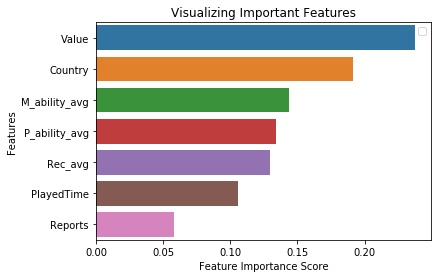

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()